# Chapter 8: Model Portfolio Construction

In [ ]:
#HEADING 2: Creating a Portfolio of ETFs
#SKILL 2: Learn how to create your first Portfolio
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

class Allocation:
  def __init__(self, ticker, percentage):
    self.ticker = ticker
    self.percentage = percentage

In [ ]:
# SPDR S&P 500 Trust ETF (SPY)
# iShares 20+ Year Treasury Bond ETF (TLT)
stocks = Allocation("SPY", 0.6)
bonds = Allocation("TLT", 0.4)
myPortfolio = Portfolio("Growth", 4)
myPortfolio.allocations.append(stocks)
myPortfolio.allocations.append(bonds)

In [ ]:
#HEADING 3: Portfolio Breakdown by Asset Class and Region and Sector
#SKILL 3: Learn how to analyze the makeup of your Portfolio
import yfinance as yf
spy = yf.Ticker("SPY")
tlt = yf.Ticker("TLT")

#spy.info
#print(bnd.info)

In [ ]:
# Asset Class
import matplotlib.pyplot as plt
import numpy as np

assetClassWeights = [myPortfolio.allocations[0].percentage, myPortfolio.allocations[1].percentage]
assetClassLabels = ["Stocks", "Bonds"]

plt.pie(assetClassWeights, labels = assetClassLabels)
plt.show()

In [ ]:
# Region

stockMarket = spy.info["market"]
bondMarket = tlt.info["market"]

import pandas as pd
df = pd.DataFrame([[stockMarket,myPortfolio.allocations[0].percentage],[bondMarket,myPortfolio.allocations[1].percentage]])
df = df.groupby(0).sum().reset_index()

In [ ]:
assetClassWeights = [df.loc[0][1]]
assetClassLabels = [df.loc[0][0]]

plt.pie(assetClassWeights, labels = assetClassLabels)
plt.show()

In [ ]:
# Sector Weights
sectors1 = spy.info["sectorWeightings"]
sectors2 = tlt.info["sectorWeightings"]

df = pd.DataFrame(sectors1)
df2 = pd.DataFrame(sectors2)
df = df.append(df2)
df.index.name = "index"

df = df.groupby("index", dropna=True).sum().sum().reset_index()

In [ ]:
sectorWeights = df[df.columns[1]]
sectorLabels = df[df.columns[0]]

In [ ]:
plt.pie(sectorWeights, labels = sectorLabels)
plt.show()

In [ ]:
for index, value in sectorLabels.iteritems():
  sectorLabels[index] = (value.capitalize().replace("_", " "))

plt.pie(sectorWeights, labels = sectorLabels)
plt.show()

In [ ]:
#HEADING 4: Creating Model Portfolios with Risk Bands
#SKILL 4: Learn how to create multiple Portfolios using Risk Bands

df = yf.download("SPY TLT", group_by="Ticker", period="20y")

In [ ]:
df

In [ ]:
df = df.iloc[:, df.columns.get_level_values(1)=="Close"]
df

In [ ]:
df = df.dropna()

In [ ]:
df.columns = df.columns.droplevel(1)
df

In [ ]:
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

  def getDailyPrices(self, period):
    tickerStringList = ""
    for allocation in self.allocations:
      tickerStringList = tickerStringList + str(allocation.ticker) + " "
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

In [ ]:
stocks = Allocation("SPY", 0.6)
bonds = Allocation("TLT", 0.4)
myPortfolio = Portfolio("Growth", 4)
myPortfolio.allocations.append(stocks)
myPortfolio.allocations.append(bonds)

df = myPortfolio.getDailyPrices("20y")
df

In [ ]:
# NOTE: Read Python For Finance for a bottoms up approach to MPT

import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

In [ ]:
# TODO: Visualize the EF
import matplotlib.pyplot as plt
from pypfopt import plotting
fig, ax = plt.subplots()
ef = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
ef.clean_weights()

In [ ]:
# Risk bands?
# Set constraints for 2, 4, 6, 8, 10% returns using efficient_return()
ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolio1 = ef.clean_weights()
print(portfolio1)
ef.efficient_return(0.04)
portfolio2 = ef.clean_weights()
print(portfolio2)
ef.efficient_return(0.06)
portfolio3 = ef.clean_weights()
print(portfolio3)
ef.efficient_return(0.08)
portfolio4 = ef.clean_weights()
print(portfolio4)
ef.efficient_return(0.10)
portfolio5 = ef.clean_weights()
print(portfolio5)

In [ ]:
def getDailyPrices(tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data
df = getDailyPrices("VTI TLT IEI GLD DBC", "20y")
df

In [ ]:
# Add some tech stocks now we can go up to 12%!

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Risk bands?
# Set constraints for 2, 4, 6, 8, 10% returns using efficient_return()
ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolioWeights1 = ef.clean_weights()
print(portfolioWeights1)
ef.efficient_return(0.04)
portfolioWeights2 = ef.clean_weights()
print(portfolioWeights2)
ef.efficient_return(0.06)
portfolioWeights3 = ef.clean_weights()
print(portfolioWeights3)
ef.efficient_return(0.08)
portfolioWeights4 = ef.clean_weights()
print(portfolioWeights4)
ef.efficient_return(0.10)
portfolioWeights5 = ef.clean_weights()
print(portfolioWeights5)

In [ ]:
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

  def getDailyPrices(self, period):
    tickerStringList = ""
    for allocation in self.allocations:
      tickerStringList = tickerStringList + str(allocation.ticker) + " "
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

In [ ]:
newPortfolio = Portfolio("Aggressive Growth", 5)

for key, value in portfolioWeights5.items():
  newAllocation = Allocation(key, value)
  newPortfolio.allocations.append(newAllocation)

newPortfolio.printPortfolio()

In [ ]:
def getPortfolio(riskBucket: int) -> Portfolio:

  df = getDailyPrices("SPY TLT AAPL GOOG MSFT", "20y")

  mu = expected_returns.mean_historical_return(df)
  S = risk_models.sample_cov(df)

  ef = EfficientFrontier(mu, S)
  expectedReturn = 0
  portfolioName = ""

  if(riskBucket == 1):
    expectedReturn = 0.02
    portfolioName = "Conservative"
  elif(riskBucket == 2):
    expectedReturn = 0.04
    portfolioName = "Moderate"
  elif(riskBucket == 3):
    expectedReturn = 0.06
    portfolioName = "Moderate Growth"
  elif(riskBucket == 4):
    expectedReturn = 0.08
    portfolioName = "Growth"
  elif(riskBucket == 5):
    expectedReturn = 0.12
    portfolioName = "Aggressive Growth"
  else:
    return -1

  ef.efficient_return(expectedReturn)
  expectedRisk = ef.portfolio_performance()[1]
  portfolioWeights = ef.clean_weights()

  newPortfolio = Portfolio(portfolioName, riskBucket)
  newPortfolio.expectedReturn = expectedReturn
  newPortfolio.expectedRisk = expectedRisk

  for key, value in portfolioWeights.items():
    newAllocation = Allocation(key, value)
    newPortfolio.allocations.append(newAllocation)

  return newPortfolio

In [ ]:
myPortfolio = getPortfolio(5)
myPortfolio.printPortfolio()

In [ ]:
class Portfolio:

  def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

    self.name = portfolioName
    self.riskBucket = riskBucket
    self.expectedReturn = expectedReturn
    self.allocations = []

    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    df = self.__getDailyPrices(tickerString, "20y")

    self.mu = expected_returns.mean_historical_return(df)
    self.S = risk_models.sample_cov(df)

    ef = EfficientFrontier(self.mu, self.S)

    ef.efficient_return(expectedReturn)
    self.expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    for key, value in portfolioWeights.items():
      newAllocation = Allocation(key, value)
      self.allocations.append(newAllocation)

  def __getDailyPrices(self, tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

  def showEfficientFrontier(self):
      import copy
      import numpy as np
      ef = EfficientFrontier(self.mu, self.S)
      fig, ax = plt.subplots()
      ef_max_sharpe = copy.deepcopy(ef)
      ef_return = copy.deepcopy(ef)
      plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

      # Generate random portfolios
      n_samples = 10000
      w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
      rets = w.dot(ef.expected_returns)
      stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
      sharpes = rets / stds
      ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

      # Find the tangency portfolio
      ef_max_sharpe.max_sharpe()
      ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
      ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

      # Find the return portfolio
      ef_return.efficient_return(self.expectedReturn)
      ret_tangent2, std_tangent2, _ = ef_return.portfolio_performance()
      returnP = str(int(self.expectedReturn*100))+"%"
      ax.scatter(std_tangent2, ret_tangent2, marker="*", s=100, c="y", label=returnP)

      # Output
      ax.set_title("Efficient Frontier for " + returnP + " returns")
      ax.legend()
      plt.tight_layout()
      plt.show()

In [ ]:
myPortfolio = Portfolio("SPY TLT AAPL AMZN NFLX GOOGL MSFT", expectedReturn = 0.10, portfolioName = "Aggressive Growth", riskBucket = 5)
myPortfolio.printPortfolio()

In [ ]:
myPortfolio.showEfficientFrontier()

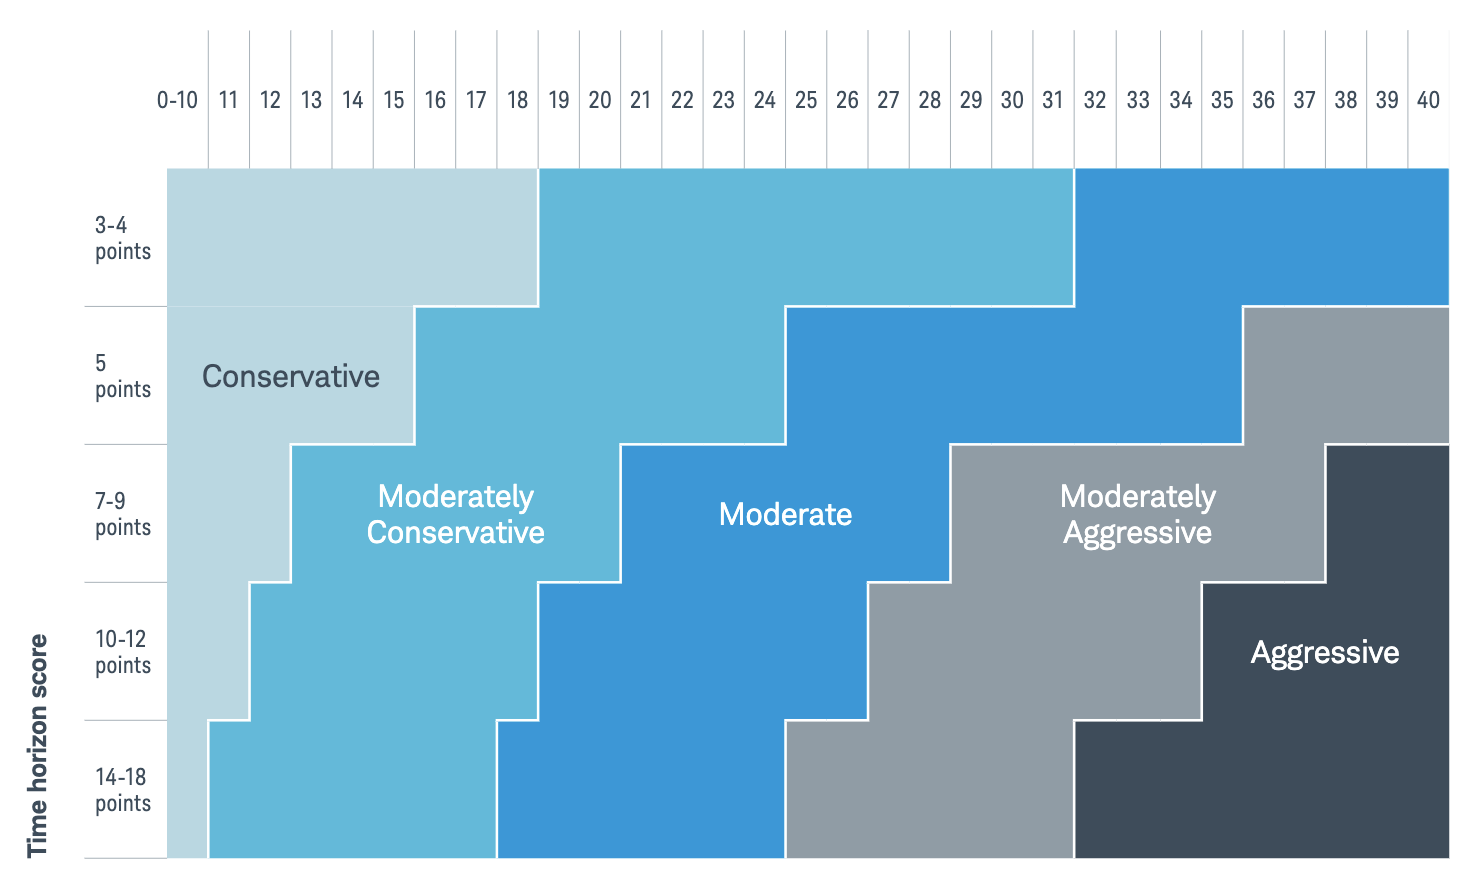

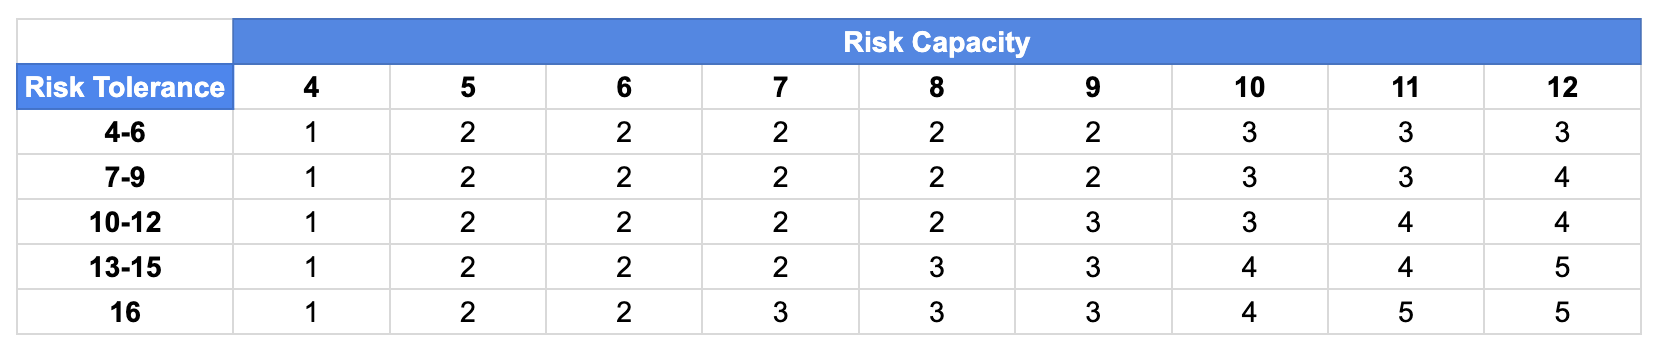

In [ ]:
#HEADING 5: Mapping Model Portfolios to Risk Scores
#SKILL 5: Learn how to map Model Portfolios to Risk Scores

import pandas as pd
allocationMappingTable = pd.DataFrame(
    [[1,2,2,2,2,2,3,3,3,3],
     [1,2,2,2,2,2,3,3,4,4],
     [1,2,2,2,2,3,3,4,4,4],
     [1,2,2,2,3,3,4,4,5,5],
     [1,2,2,3,3,3,4,4,5,5]]
)

allocationLookupTable = pd.DataFrame(
    columns = ["Portfolio","Capacity_min", "Capacity_max", "Tolerance_min", "Tolerance_max"],
    data = 
    [[1,0,10,4,6],
     [1,0,10,7,9],
     [1,0,10,10,12],
     [1,0,10,13,15],
     [1,0,10,16,16],
     [2,11,20,4,6],
     [2,11,20,7,9],
     [2,11,20,10,12],
     [2,11,20,13,15],
     [2,11,20,16,16],
     [2,21,30,4,6],
     [2,21,30,7,9],
     [2,21,30,10,12],
     [2,21,30,13,15],
     [2,21,30,16,16],
     [2,31,40,4,6],
     [2,31,40,7,9],
     [2,31,40,10,12],
     [2,31,40,13,15],
     [3,31,40,16,16],
     [2,41,50,4,6],
     [2,41,50,7,9],
     [2,41,50,10,12],
     [3,41,50,13,15],
     [3,41,50,16,16],
     [2,51,60,4,6],
     [2,51,60,7,9],
     [3,51,60,10,12],
     [3,51,60,13,15],
     [3,51,60,16,16],
     [3,61,70,4,6],
     [3,61,70,7,9],
     [3,61,70,10,12],
     [4,61,70,13,15],
     [4,61,70,16,16],
     [3,71,80,4,6],
     [3,71,80,7,9],
     [4,71,80,10,12],
     [4,71,80,13,15],
     [4,71,80,16,16],
     [3,81,90,4,6],
     [4,81,90,7,9],
     [4,81,90,10,12],
     [5,81,90,13,15],
     [5,81,90,16,16],
     [3,91,100,4,6],
     [4,91,100,7,9],
     [4,91,100,10,12],
     [5,91,100,13,15],
     [5,91,100,16,16],]
)

allocationLookupTable

In [ ]:
# Read from CSV
allocationLookupTable=pd.read_csv('./Data/Risk Mapping Lookup.csv')
allocationLookupTable

In [ ]:
class Portfolio:

  def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

    self.name = portfolioName
    self.riskBucket = riskBucket
    self.expectedReturn = expectedReturn
    self.allocations = []

    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    df = self.__getDailyPrices(tickerString, "20y")

    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)

    ef = EfficientFrontier(mu, S)

    ef.efficient_return(expectedReturn)
    self.expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    for key, value in portfolioWeights.items():
      newAllocation = Allocation(key, value)
      self.allocations.append(newAllocation)

  def __getDailyPrices(self, tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

  @staticmethod
  def getPortfolioMapping(riskToleranceScore, riskCapacityScore):
    import pandas as pd
    allocationLookupTable=pd.read_csv('./Data/Risk Mapping Lookup.csv')
    matchTol = (allocationLookupTable['Tolerance_min'] <= riskToleranceScore) & (allocationLookupTable['Tolerance_max'] >= riskToleranceScore)
    matchCap = (allocationLookupTable['Capacity_min'] <= riskCapacityScore) & (allocationLookupTable['Capacity_max'] >= riskCapacityScore)
    portfolioID = allocationLookupTable['Portfolio'][(matchTol & matchCap)]
    return portfolioID.values[0]

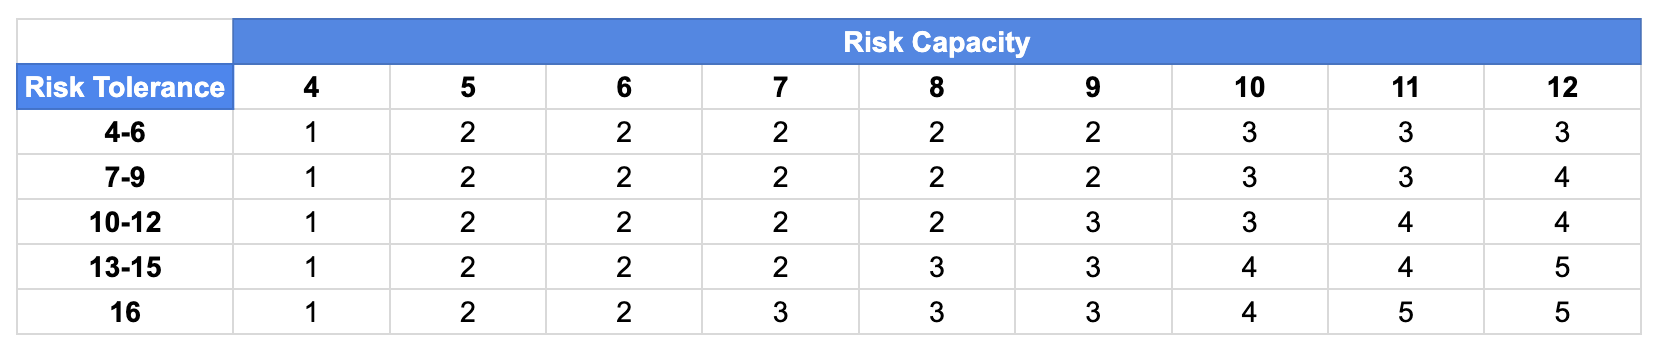

In [ ]:
# Tol 10, Cap 9
riskTolScore = 10
riskCapScore = 9
#riskTolScore = toleranceQuestionnaire.score
#riskCapScore = capacityQuestionnaire.score

myPortfolioID = Portfolio.getPortfolioMapping(riskTolScore, riskCapScore)
print(myPortfolioID)

In [ ]:
# TODO: Read portfolios from csv with name, returns, tickerlist (same) per row
myPortfolio = Portfolio("SPY TLT AAPL GOOG MSFT", expectedReturn = 0.12, portfolioName = "Aggressive Growth", riskBucket = 5)
myPortfolio.printPortfolio()